### Udacity Inferential Statistics


In [24]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import the data into a series

Klout = pd.read_csv('Klout scores (Lesson 7) - Sheet1.csv',  squeeze = True, header=0)

In [8]:
print (Klout[0:5])
print (type(Klout))

0    60.908747
1    23.222238
2    51.553491
3    22.629690
4    53.338099
Name: 25.10417915, dtype: float64
<class 'pandas.core.series.Series'>


In [9]:
# mean
np.mean(Klout)

37.73110342440305

In [10]:
# Standard Deviation
np.std(Klout)

16.039573139265414

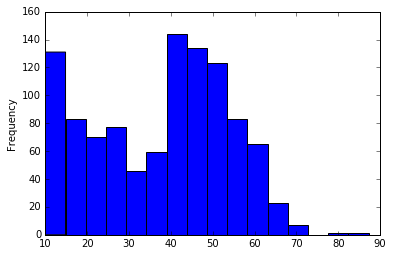

In [14]:
# frequency distribution
Klout.plot.hist(bins = 16)

### What is the standard deviation of the sample means?

This is the Standard Error and is calculated `std/sqrt(n)` where std is the population std and n is the number of samples.


In [19]:
# standard error
std_sample_mean = (np.std(Klout))/math.sqrt(35)
print (std_sample_mean)

2.7111826965358787


(array([ 5.,  1.,  5.,  8.,  5.,  2.,  2.,  4.,  0.,  3.]),
 array([ 32.51597319,  33.63397444,  34.75197568,  35.86997692,
         36.98797817,  38.10597941,  39.22398065,  40.3419819 ,
         41.45998314,  42.57798439,  43.69598563]),
 <a list of 10 Patch objects>)

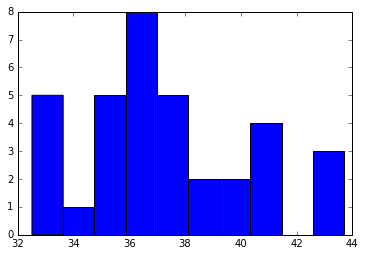

In [42]:
# plot the distribution of the sampling distribution
mu, sigma = 37.72, 2.71 # mean and standard deviation
s = np.random.normal(mu, sigma, 35)

bins = 1000
plt.hist(s)

In [43]:
# Standard error with a population size of 250

std_error = (np.std(Klout))/math.sqrt(250)
print(std_error)

1.0144316763387164


In [44]:
# z-score
zscore = 40.0-mu/1.0144
print(zscore)

# the value in the tutorial is 2.26, not sure how.

2.815457413249213
